In [1]:
import pandas as pd
import numpy as np

# Load data
df = pd.read_csv('Algerian_forest_fires_cleaned.csv')

In [2]:
# Displaying first few rows
print(df.head())

# Get information about the columns
print(df.info())

# Summary statistics for numerical columns
print(df.describe())

# Checking the size of dataset
print(df.shape)

   day  month  year  Temperature  RH  Ws  Rain  FFMC  DMC    DC  ISI  BUI  \
0    1      6  2012           29  57  18   0.0  65.7  3.4   7.6  1.3  3.4   
1    2      6  2012           29  61  13   1.3  64.4  4.1   7.6  1.0  3.9   
2    3      6  2012           26  82  22  13.1  47.1  2.5   7.1  0.3  2.7   
3    4      6  2012           25  89  13   2.5  28.6  1.3   6.9  0.0  1.7   
4    5      6  2012           27  77  16   0.0  64.8  3.0  14.2  1.2  3.9   

   FWI      Classes  Region  
0  0.5  not fire          0  
1  0.4  not fire          0  
2  0.1  not fire          0  
3  0.0  not fire          0  
4  0.5  not fire          0  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243 entries, 0 to 242
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          243 non-null    int64  
 1   month        243 non-null    int64  
 2   year         243 non-null    int64  
 3   Temperature  243 non-null    int64  


In [3]:
# Check for missing values
print(df.isnull().sum()) 

day            0
month          0
year           0
Temperature    0
RH             0
Ws             0
Rain           0
FFMC           0
DMC            0
DC             0
ISI            0
BUI            0
FWI            0
Classes        0
Region         0
dtype: int64


In [4]:
# Looking for all the classes in dataset
df.Classes.unique()

array(['not fire   ', 'fire   ', 'fire', 'fire ', 'not fire', 'not fire ',
       'not fire     ', 'not fire    '], dtype=object)

In [5]:
'''
As we can see, the ‘Classes’ column has two distinct values: ‘fire’ and ‘not fire’ but are represented differently. 
Let’s encode it to ensure only two distinct values: 1 for ‘fire’ and 0 for ‘not fire’.
'''
df['ClassNum']=np.where(df['Classes'].str.contains('not fire'),0,1)

# Removing the columns Classes and year (just has a single value)
df = df.drop(['Classes','year'],axis=1)

In [6]:
# Categories count in ClassNum
df['ClassNum'].value_counts()

ClassNum
1    137
0    106
Name: count, dtype: int64

In [7]:
df.head()

,day,month,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Region,ClassNum
0,1,6,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0,0
1,2,6,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0,0
2,3,6,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0,0
3,4,6,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0,0
4,5,6,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0,0


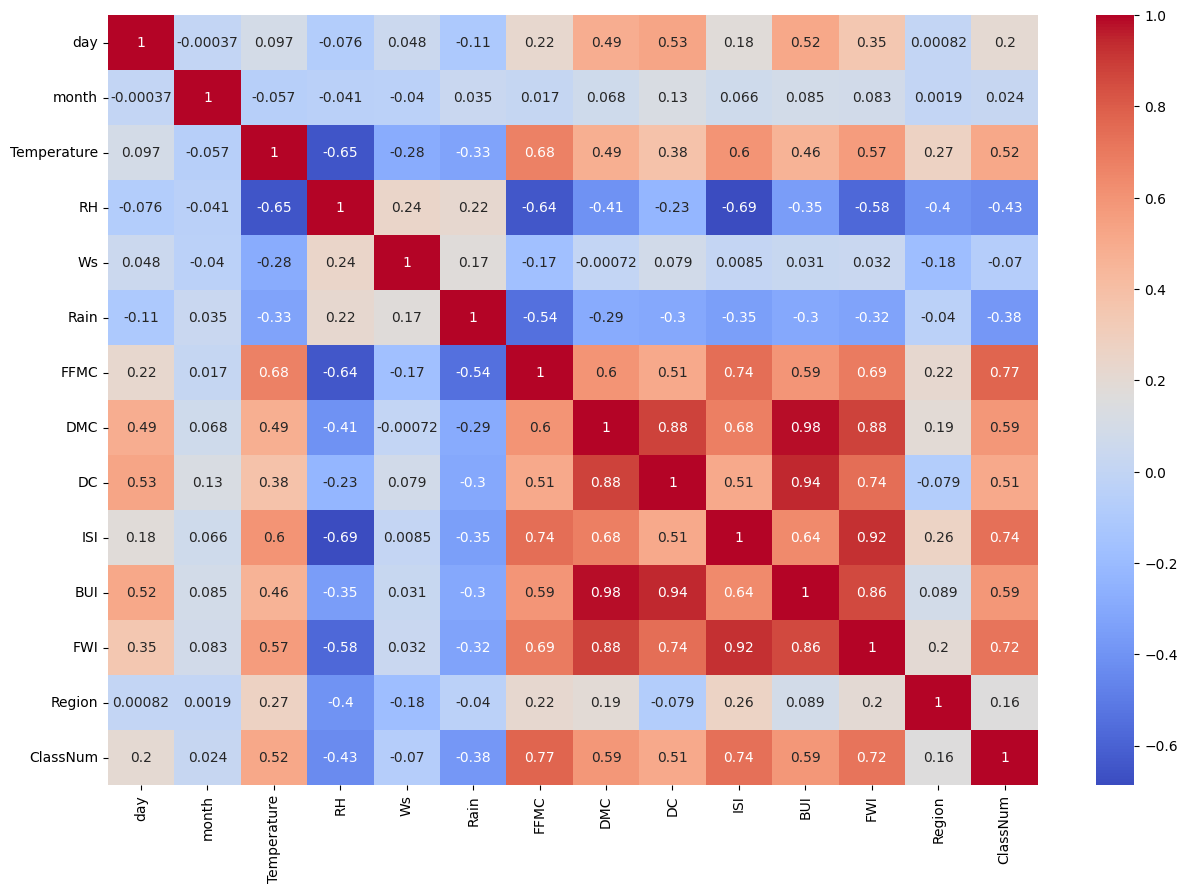

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

# Correlation between all numerical columns
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.show()

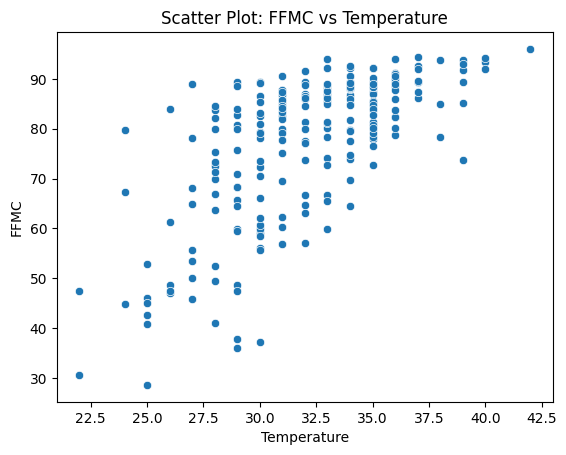

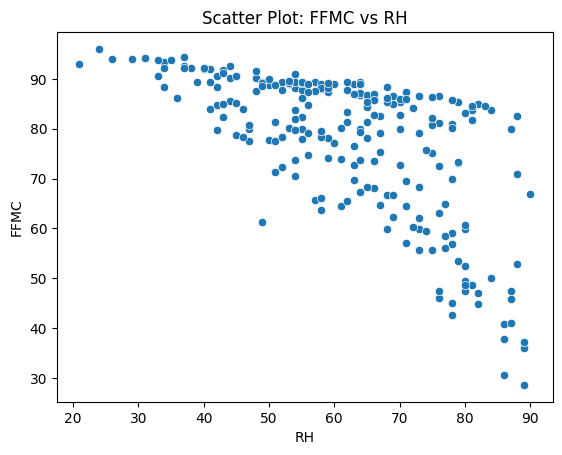

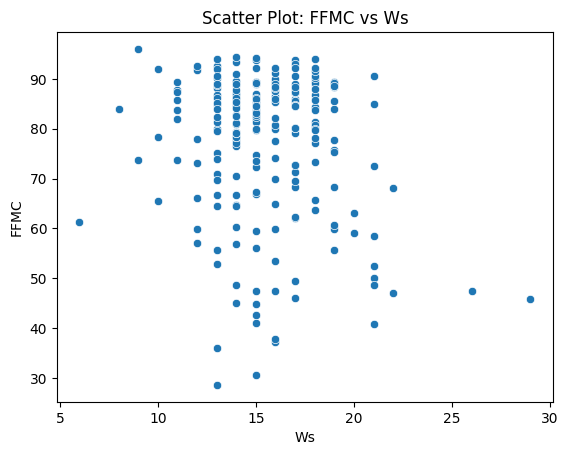

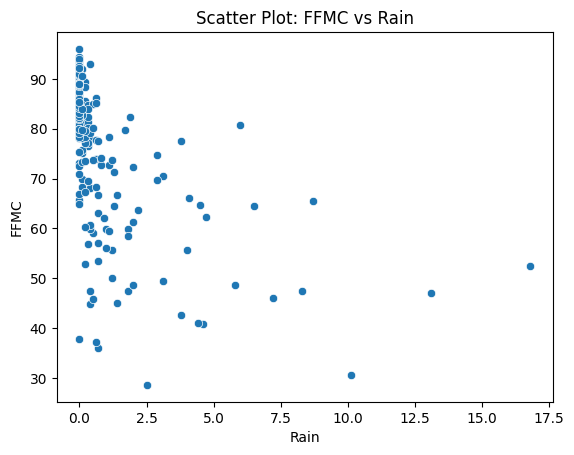

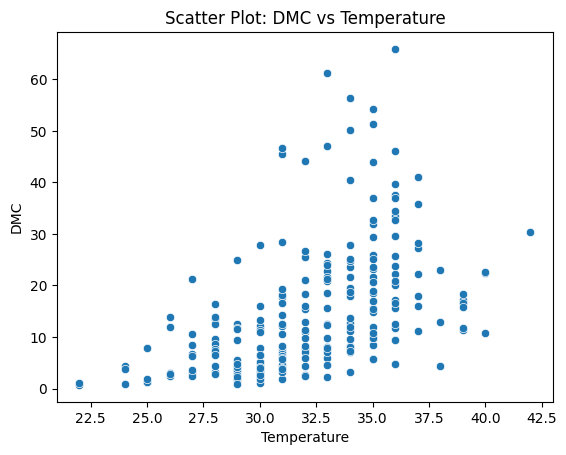

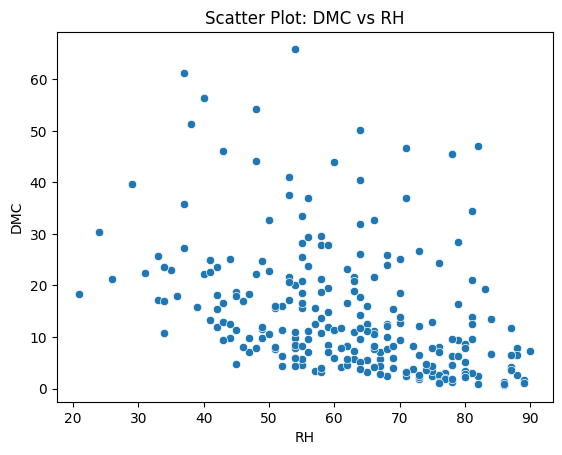

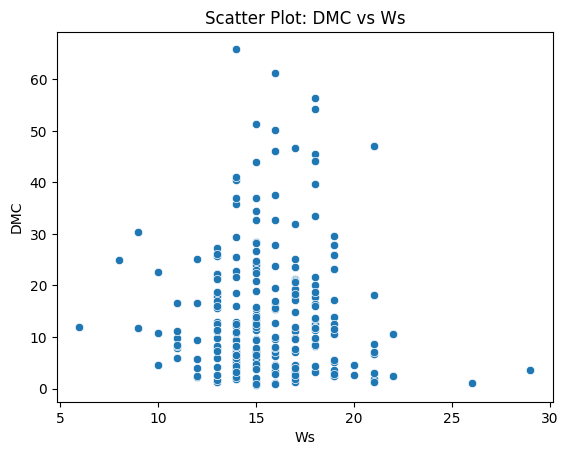

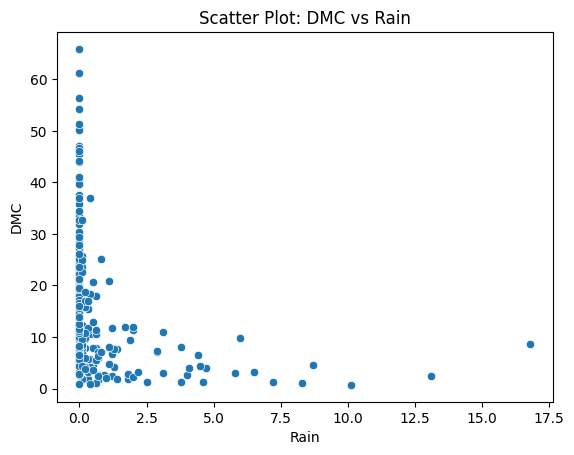

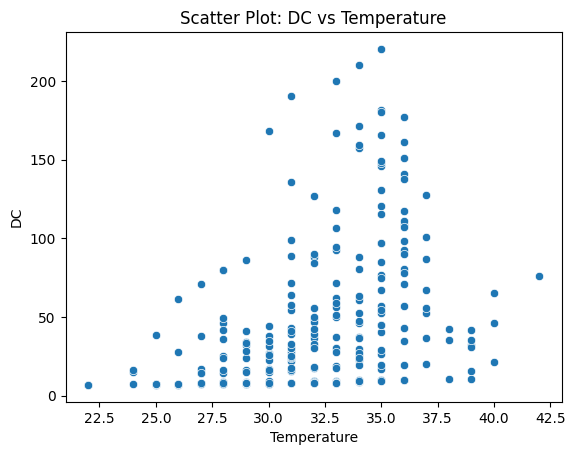

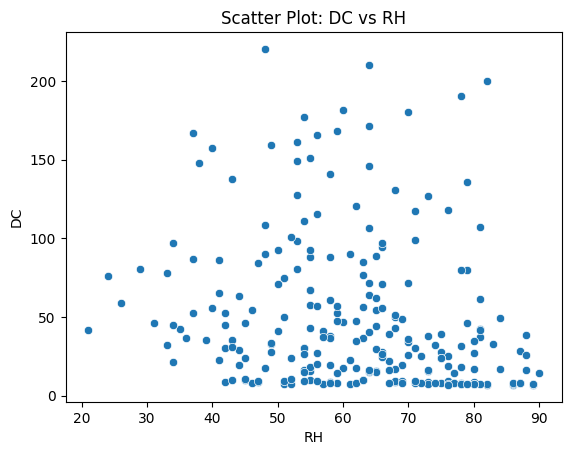

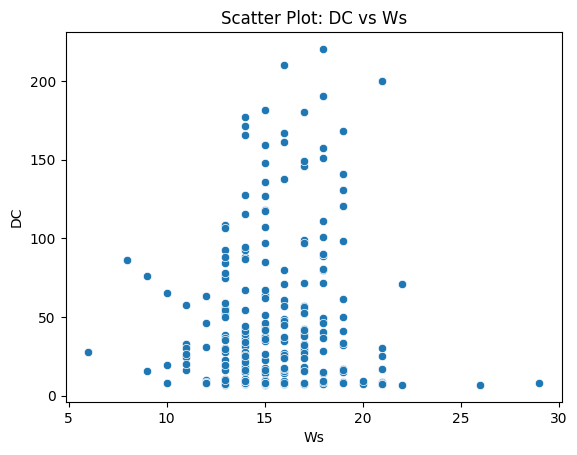

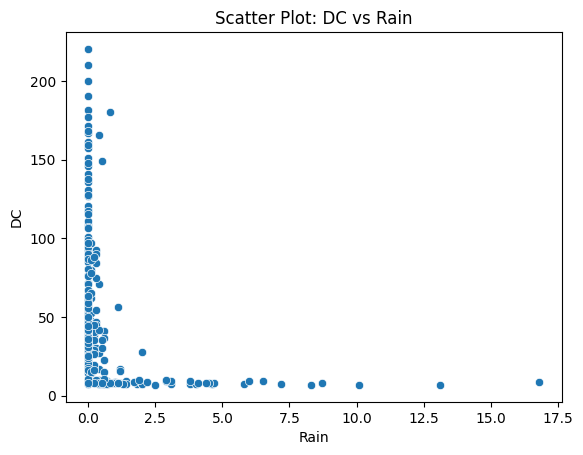

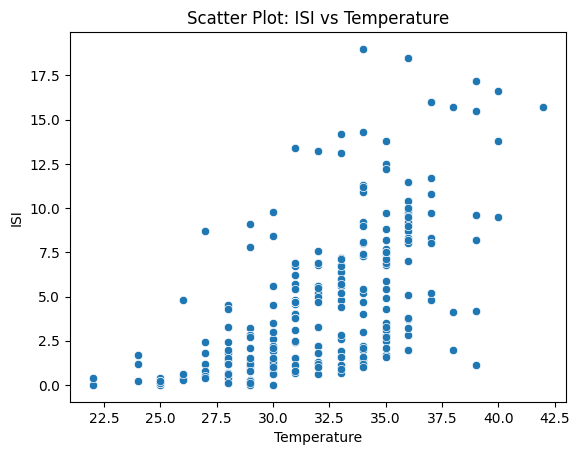

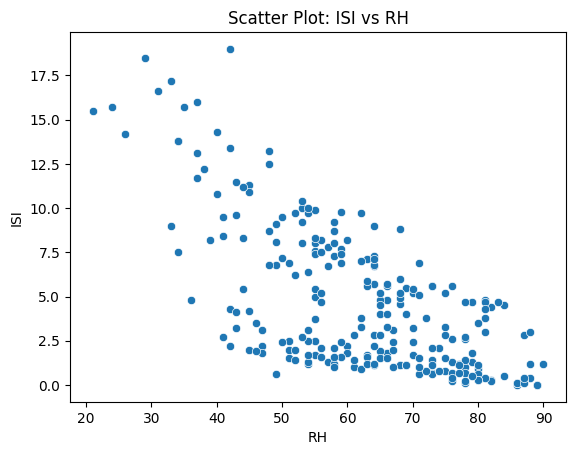

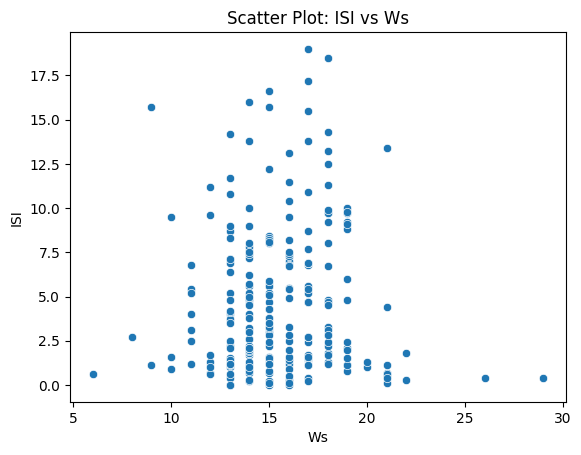

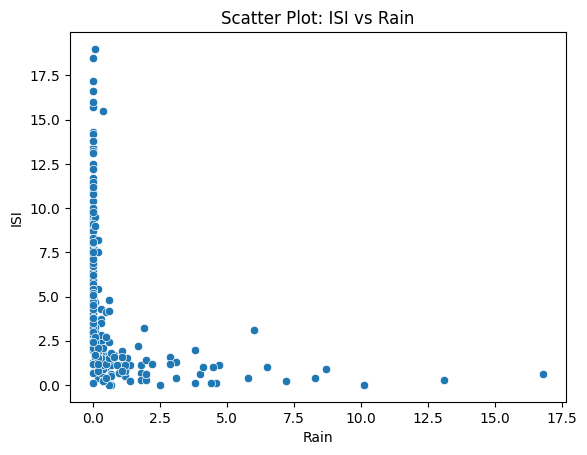

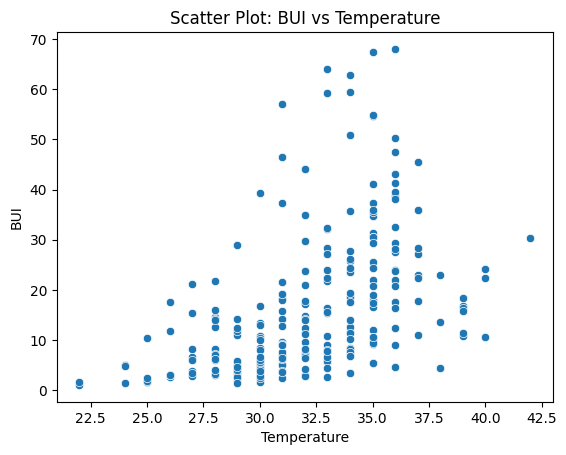

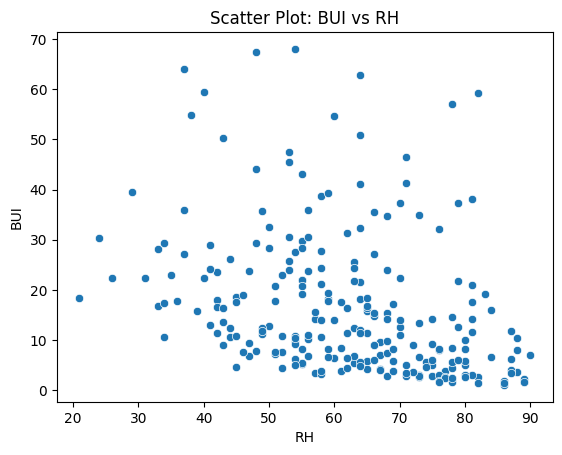

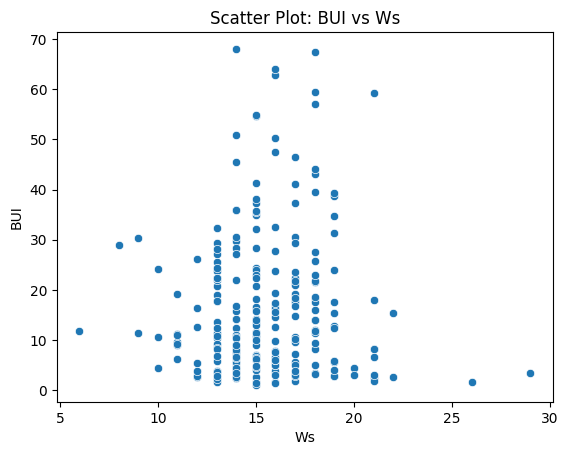

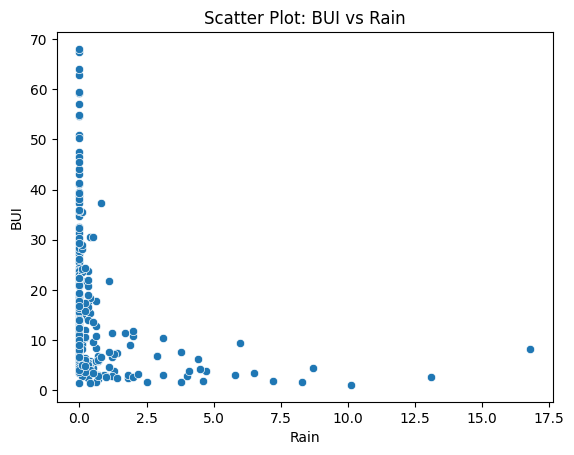

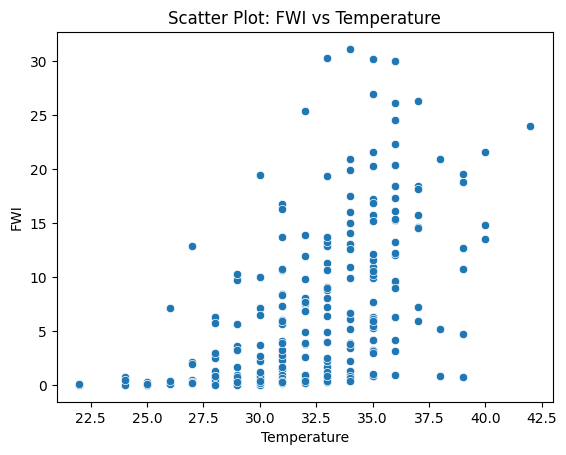

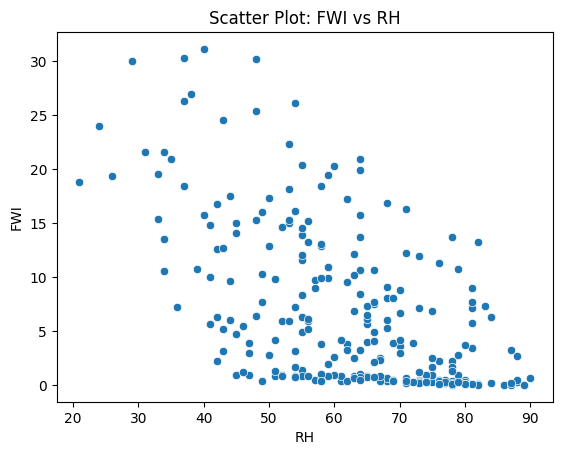

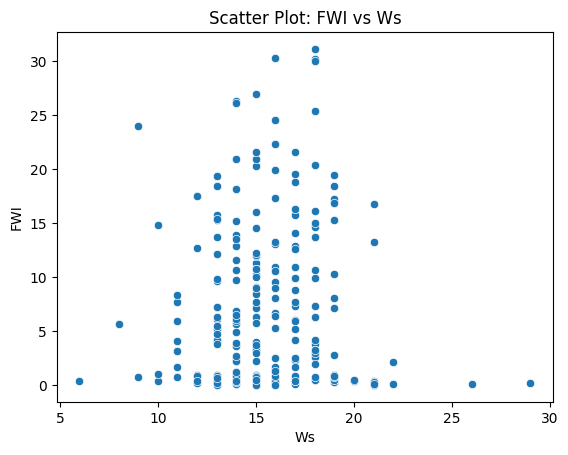

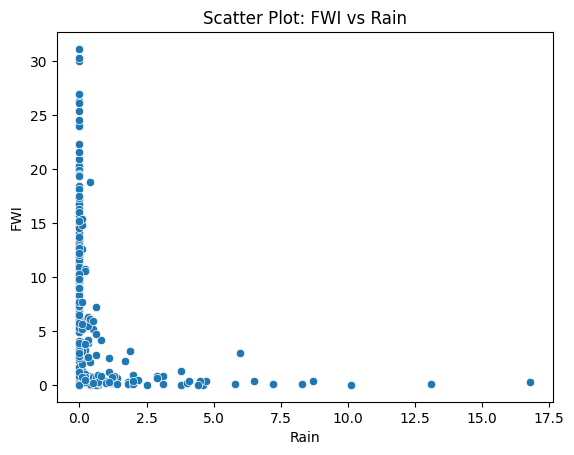

In [9]:
# List of fire-related indices
fire_indices = ['FFMC', 'DMC', 'DC', 'ISI', 'BUI', 'FWI']

# List of weather variables
weather_variables = ['Temperature', 'RH', 'Ws', 'Rain']

# Create scatter plots for each combination of fire index and weather variable
for fire_index in fire_indices:
    for weather_variable in weather_variables:
        sns.scatterplot(x=weather_variable, y=fire_index, data=df)
        plt.title(f'Scatter Plot: {fire_index} vs {weather_variable}')
        plt.xlabel(weather_variable)
        plt.ylabel(fire_index)
        plt.show()

**Observations**

Relevant Correlations:
- Temperature with FFMC and ISI, above 0.6
- FFMC, FWI, DMC, DC, ISI, BUI, all of them with coefficients from 0.51 to 0.98
- RH, Ws, and Rain have a weak correlation with ranges between -0.69 and 0.24 

Temperature, RH, Ws, and Rain are direct meteorological measurements that influence fire behavior. They represent fundamental aspects of the environment that can directly impact fuel moisture content and fire spread potential.
FFMC, DMC, DC, ISI, and BUI are fire indices derived from various weather variables, including the features mentioned before. Including both the raw weather data and the derived indices might introduce redundancy and multicollinearity, potentially complicating the model and making interpretation more challenging.
Weather data (Temperature, RH, Ws, and Rain) is generally readily available from weather stations or forecasts, making the model applicable in real-world scenarios where fire indices might not be directly accessible.

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# 1. Select features (X) and target variable (y)
X = df[['Temperature', 'RH', 'Ws', 'Rain']]  # Features
y = df['FWI']  # Target variable

# 2. Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 3. Create and train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# 4. Make predictions on the test set
y_pred = model.predict(X_test)

# 5. Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')
print(f'Mean Absolute Error: {mae}')

# 6. Interpret coefficients
print(f'Coefficients: {model.coef_}')
print(f'Intercept: {model.intercept_}')

Mean Squared Error: 27.825144334007934
R-squared: 0.3774637898100499
Mean Absolute Error: 4.162279697107184
Coefficients: [ 0.69674197 -0.21075401  0.72723972 -0.67584392]
Intercept: -12.706853526318035


**Metrics Interpretation**

- MSE: Tell us that the squared difference between the model's prediction and the actual FWI values is about 27.82. In simpler terms, the model predictions deviate by about 5.27 units of FWI, which is the square root of this value. Lower MSE values signify better model performance.
- RS: Approximately 37.7% of the variation in FWI can be accounted for by the combined effects of Temperature, RH, Ws, and Rain in the linear model.  While not exceptionally high, it suggests that the model captures some meaningful relationships.
- Coefficients:
  - Temperature. A one-unit increase in temperature is associated with an estimated 0.6967 unit increase in FWI, holding other variables constant.
  - RH. A one-unit increase in relative humidity is associated with an estimated 0.2108 unit decrease in FWI.
  - Ws. A one-unit increase in wind speed is associated with an estimated 0.7272 unit increase in FWI.
  - Rain. A one-unit increase in rain is associated with an estimated 0.6758 unit decrease in FWI.
- Intercept: This is the predicted FWI value when all the features (Temperature, RH, Ws, and Rain) are zero. However, it's important to note that this interpretation might not be practically meaningful, especially if zero values for these features are outside the normal range of the data.


**Conclusion**

The model shows some ability to predict FWI based on weather conditions, but it could be improved by choosing additional features or more complex models.


In [16]:
'''
Lasso Regression - L1 Regularization
'''
from sklearn.linear_model import Lasso

# Create and train the Lasso regression model
lasso_model = Lasso(alpha=0.1)  # Adjust alpha (regularization strength) as needed
lasso_model.fit(X_train, y_train)

# Make predictions and evaluate
y_pred_lasso = lasso_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred_lasso)
r2 = r2_score(y_test, y_pred_lasso)
mae = mean_absolute_error(y_test, y_pred_lasso)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')
print(f'Mean Absolute Error: {mae}')

# Print coefficients to observe sparsity
print(f'Lasso Coefficients: {lasso_model.coef_}')

Mean Squared Error: 27.734383902623414
R-squared: 0.37949438682371095
Mean Absolute Error: 4.158670884744728
Lasso Coefficients: [ 0.6854382  -0.21208145  0.70455404 -0.65196971]


**Metrics Interpretation**

- MSE: The prediction is off by approximately 5.27 units of FWI (Square root MSE). 
- RS: Implies that roughly 37.9% of the variability in FWI can be attributed to the combined effects of Temperature, RH, Ws, and Rain in the model.
- MAE: The Model's predictions are, on average, off by about 4.16 units of FWI. 
- Coefficients:
  - Temperature. A one-unit increase in temperature is associated with an estimated 0.6854 unit increase in FWI, all else being equal.
  - RH. A one-unit increase in relative humidity corresponds to an estimated 0.2121 unit decrease in FWI.
  - Ws. A one-unit increase in wind speed is linked to an estimated 0.7046 unit increase in FWI.
  - Rain. A one-unit increase in rain is associated with an estimated 0.6520 unit decrease in FWI.


**Conclusion**

The Lasso regression model demonstrates some predictive capability for FWI based on the given weather features. The MSE and MAE suggest a reasonable level of accuracy, while the R-squared indicates that a fair amount of variance in FWI is explained by the model.

In [19]:
'''
Ridge Regression - L2 Regularization
'''
from sklearn.linear_model import Ridge

# Create and train the Ridge regression model
ridge_model = Ridge(alpha=0.1)  # Adjust alpha
ridge_model.fit(X_train, y_train)

# Make predictions and evaluate
y_pred_ridge = ridge_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred_ridge)
r2 = r2_score(y_test, y_pred_ridge)
mae = mean_absolute_error(y_test, y_pred_ridge)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')
print(f'Mean Absolute Error: {mae}')

# Print coefficients to observe sparsity
print(f'Lasso Coefficients: {ridge_model.coef_}')

Mean Squared Error: 27.824763235256423
R-squared: 0.37747231619070865
Mean Absolute Error: 4.162264236487772
Lasso Coefficients: [ 0.69668904 -0.21076165  0.72714429 -0.67574793]


**Metrics Interpretation**

- MSE: The prediction is off by approximately 5.27 units of FWI (Square root MSE). 
- RS: Implies that roughly 37.7% of the variability in FWI can be attributed to the combined effects of Temperature, RH, Ws, and Rain in the model.
- MAE: The Model's predictions are, on average, off by about 4.16 units of FWI. 
- Coefficients:
  - Temperature. A one-unit increase in temperature is associated with an estimated 0.6966 unit increase in FWI, all else being equal.
  - RH. A one-unit increase in relative humidity corresponds to an estimated 0.2107 unit decrease in FWI.
  - Ws. A one-unit increase in wind speed is linked to an estimated 0.7271 unit increase in FWI.
  - Rain. A one-unit increase in rain is associated with an estimated 0.6757 unit decrease in FWI.


**Conclusion**

The Ridge regression model demonstrates a moderate ability to predict FWI based on the chosen weather features. While there's room for improvement, the MSE, MAE, and R-squared values indicate a reasonable level of predictive accuracy. The coefficients shed light on the directional impact of each weather variable on FWI.

In [20]:
'''
Elastic Net Regularization
'''
from sklearn.linear_model import ElasticNet

# Create and train the ElasticNet regression model
elastic_net_model = ElasticNet(alpha=0.1, l1_ratio=0.5)  # Adjust alpha and l1_ratio
elastic_net_model.fit(X_train, y_train)

# Make predictions and evaluate
y_pred_elastic_net = elastic_net_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred_elastic_net)
r2 = r2_score(y_test, y_pred_elastic_net)
mae = mean_absolute_error(y_test, y_pred_elastic_net)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')
print(f'Mean Absolute Error: {mae}')

# Print coefficients to observe sparsity
print(f'Lasso Coefficients: {elastic_net_model.coef_}')

Mean Squared Error: 27.749904718046498
R-squared: 0.37914713724625826
Mean Absolute Error: 4.159295383730333
Lasso Coefficients: [ 0.68666871 -0.21205416  0.70799253 -0.65599577]


**Metrics Interpretation**

- MSE: The prediction is off by approximately 5.27 units of FWI (Square root MSE). 
- RS: Implies that roughly 37.9% of the variability in FWI can be attributed to the combined effects of Temperature, RH, Ws, and Rain in the model.
- MAE: The Model's predictions are, on average, off by about 4.16 units of FWI. 
- Coefficients:
  - Temperature. A one-unit increase in temperature is associated with an estimated 0.6866 unit increase in FWI, all else being equal.
  - RH. A one-unit increase in relative humidity corresponds to an estimated 0.2120 unit decrease in FWI.
  - Ws. A one-unit increase in wind speed is linked to an estimated 0.7079 unit increase in FWI.
  - Rain. A one-unit increase in rain is associated with an estimated 0.6559 unit decrease in FWI.


**Conclusion**

The Elastic Net model exhibits a moderate level of predictive capability for FWI based on the given weather features. The MSE, MAE, and R-squared values suggest a decent level of performance, although there's room for further improvement. The coefficients offer insights into the directional relationships between the predictors and FWI.

In [21]:
'''
Polynomial Regression Model
'''
from sklearn.preprocessing import PolynomialFeatures

# Create polynomial features (degree=2 for illustration)
poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

# Create and train the linear regression model
model = LinearRegression()
model.fit(X_train_poly, y_train)

# Make predictions on the test set
y_pred_poly = model.predict(X_test_poly)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred_poly)
r2 = r2_score(y_test, y_pred_poly)
mae = mean_absolute_error(y_test, y_pred_poly)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')
print(f'Mean Absolute Error: {mae}')

Mean Squared Error: 23.603855596154194
R-squared: 0.47190732841082395
Mean Absolute Error: 3.678777857642406


In [24]:
'''
Cross Validation and Hyperparameter
'''
from sklearn.model_selection import cross_val_score, GridSearchCV

# Perform cross-validation with default hyperparameters
cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')  # 5-fold cross-validation

# Convert negative MSE scores to positive for easier interpretation
mse_scores = -cv_scores
print(f'Cross-Validation MSE Scores: {mse_scores}')
print(f'Mean CV MSE: {mse_scores.mean()}')

# Hyperparameter tuning using GridSearchCV
param_grid = {
    'fit_intercept': [True, False],
    'copy_X': [True, False]
}

grid_search = GridSearchCV(model, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

# Print best hyperparameters and corresponding score
print(f'Best Hyperparameters: {grid_search.best_params_}')
print(f'Best CV MSE: {-grid_search.best_score_}')

# Train the final model with the best hyperparameters
final_model = grid_search.best_estimator_
final_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_cvhp = final_model.predict(X_test)

# Evaluate the final model
mse = mean_squared_error(y_test, y_pred_cvhp)
r2 = r2_score(y_test, y_pred_cvhp)

print(f'Test MSE: {mse}')
print(f'Test R-squared: {r2}')

Cross-Validation MSE Scores: [24.85158293 47.10584233 15.72546331 44.41350742 29.42942227]
Mean CV MSE: 32.30516365009346
Best Hyperparameters: {'copy_X': True, 'fit_intercept': True}
Best CV MSE: 32.30516365009346
Test MSE: 27.825144334007934
Test R-squared: 0.3774637898100499
